## Analysing Experiments For Training Neural Network on MNIST Using Metaflow

In [22]:
from metaflow import Metaflow, Flow, get_metadata,Run,metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/valaydave/Documents/Code-Workspace/ASU-Projects/CSE598-ML-Data-Systems/ML-Systems-Project/metaflow-kube-demo


In [23]:
print(Metaflow().flows) # Helping me find all the Main Flows/Experiments I have conducted

[Flow('MultiStepMNISTFlow')]


In [24]:
flow = Flow('MultiStepMNISTFlow') # Prints the Runs in Each Flow. 
for run in flow:
    print(run)
    for task in run:
        print(task)


Run('MultiStepMNISTFlow/1582659161951089')
Step('MultiStepMNISTFlow/1582659161951089/end')
Step('MultiStepMNISTFlow/1582659161951089/join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm_join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_join')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential_join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/start')
Run('MultiStepMNISTFlow/1582654596091205')
Step('MultiStepMNISTFlow/1582654596091205/end')
Step('MultiStepMNISTFlow/1582654596091205/join')
Step('MultiStepMNISTFlow/158265

## Analysing Individual Experiments

In [25]:
run =  flow.latest_successful_run
print(run)
print(run.data.num_training_examples)

Run('MultiStepMNISTFlow/1582659161951089')
20000


In [26]:
from metaflow import Step
for step in run:
    print(step)

run_history = run.data.history

Step('MultiStepMNISTFlow/1582659161951089/end')
Step('MultiStepMNISTFlow/1582659161951089/join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm_join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_join')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential_join')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/train_sequential_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/train_convolution_batch_norm_placeholder')
Step('MultiStepMNISTFlow/1582659161951089/start')


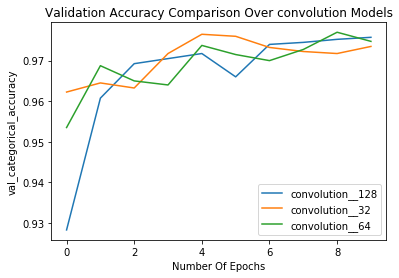

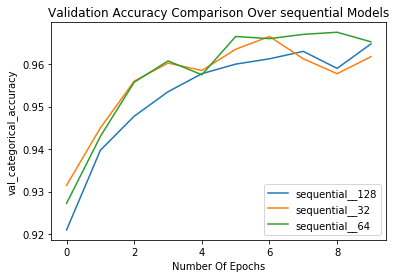

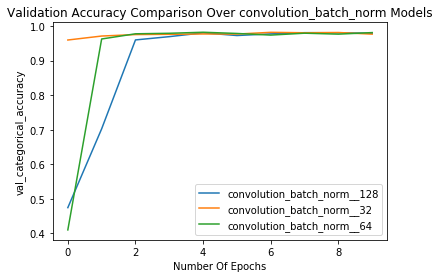

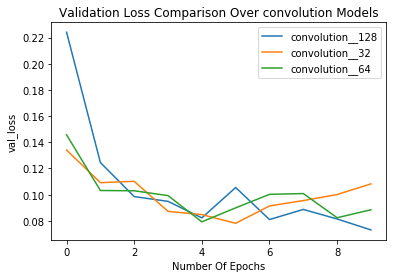

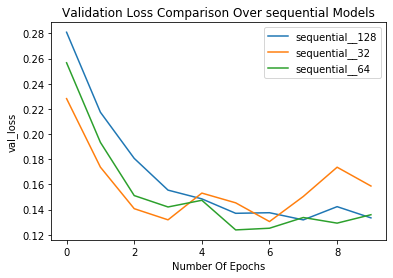

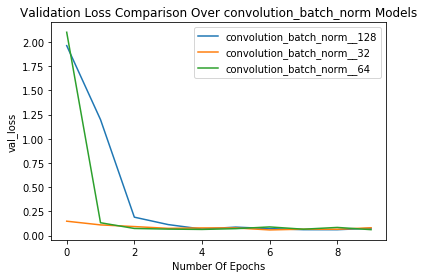

In [27]:
figures = []
legend = []
for model in run_history:
    figures.append(plt.figure())
    for param_result in run_history[model]:
        x_data = [i for i in range(len(param_result['history']['val_loss']))]
        plt.plot(x_data,param_result['history']['val_categorical_accuracy'],label=model+'__'+str(param_result['param']['batch_size']))
        plt.title('Validation Accuracy Comparison Over {} Models'.format(model))
        plt.ylabel('val_categorical_accuracy')
        plt.xlabel('Number Of Epochs')
        plt.legend(loc='best')

for model in run_history:
    figures.append(plt.figure())
    for param_result in run_history[model]:
        x_data = [i for i in range(len(param_result['history']['val_loss']))]
        plt.plot(x_data,param_result['history']['val_loss'],label=model+'__'+str(param_result['param']['batch_size']))
        plt.title('Validation Loss Comparison Over {} Models'.format(model))
        plt.ylabel('val_loss')
        plt.xlabel('Number Of Epochs')
        plt.legend(loc='best')

plt.show()